In [1]:
from rdkit import Chem, RDLogger
from rdkit.Chem import PandasTools, AllChem, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (700, 500)
IPythonConsole.drawOptions.addAtomIndices = True
RDLogger.DisableLog('rdApp.*')   

import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd

,UniqueID,SMILES,Genealogy,ID,ROMol,Energy
0,1,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,bedaquiline,,NaN
1,2,COc1[nH+]c2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](...,COc1[nH+]c2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](...,bedaquiline,,NaN
2,3,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,bedaquiline,,NaN
3,4,COc1[nH+]c2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](...,COc1[nH+]c2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](...,bedaquiline,,NaN
4,5,Cn1c(CCCC(=O)O)[nH+]c2cc(N(CCCl)CCCl)ccc21,Cn1c(CCCC(=O)O)[nH+]c2cc(N(CCCl)CCCl)ccc21 (pr...,bendamustine,,NaN
...,...,...,...,...,...,...
58,59,Brc1c2[nH]cc[nH+]c-2cc/c1=N\C1=NCC[NH2+]1,Brc1c(NC2=[NH+]CCN2)ccc2[nH+]ccnc12 (protonate...,brimonidine,,49.59952238040209
59,60,Brc1c2[nH]cc[nH+]c-2cc/c1=N\C1=NCC[NH2+]1,Brc1c(NC2=[NH+]CCN2)ccc2[nH+]ccnc12 (protonate...,brimonidine,,49.599522382049386
60,61,Brc1c2[nH]cc[nH+]c-2cc/c1=N\C1=NCC[NH2+]1,Brc1c(NC2=[NH+]CCN2)ccc2[nH+]ccnc12 (protonate...,brimonidine,,49.599522420709626
61,62,Brc1c2[nH]ccnc-2cc/c1=N\C1=[NH+]CCN1,Brc1c(NC2=[NH+]CCN2)ccc2nccnc12 (protonated)\n...,brimonidine,,53.25553032120475

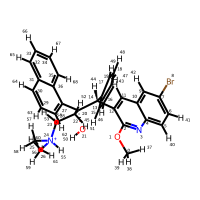
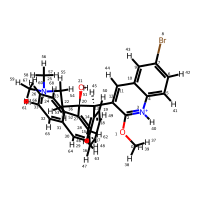
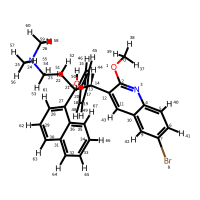
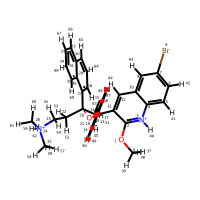
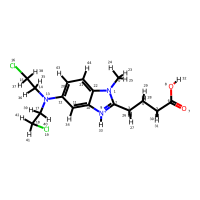
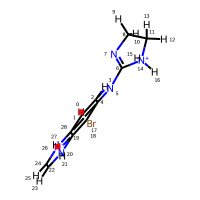
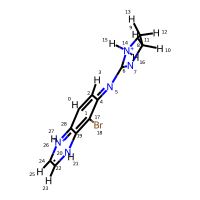
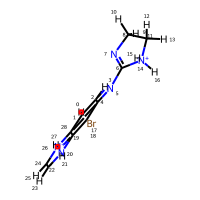
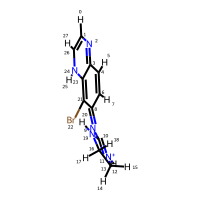
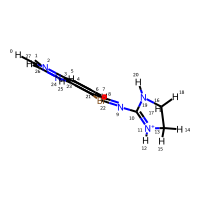

In [2]:
df: pd.DataFrame = PandasTools.LoadSDF("out/prepared_ligands.sdf", removeHs=False)
df

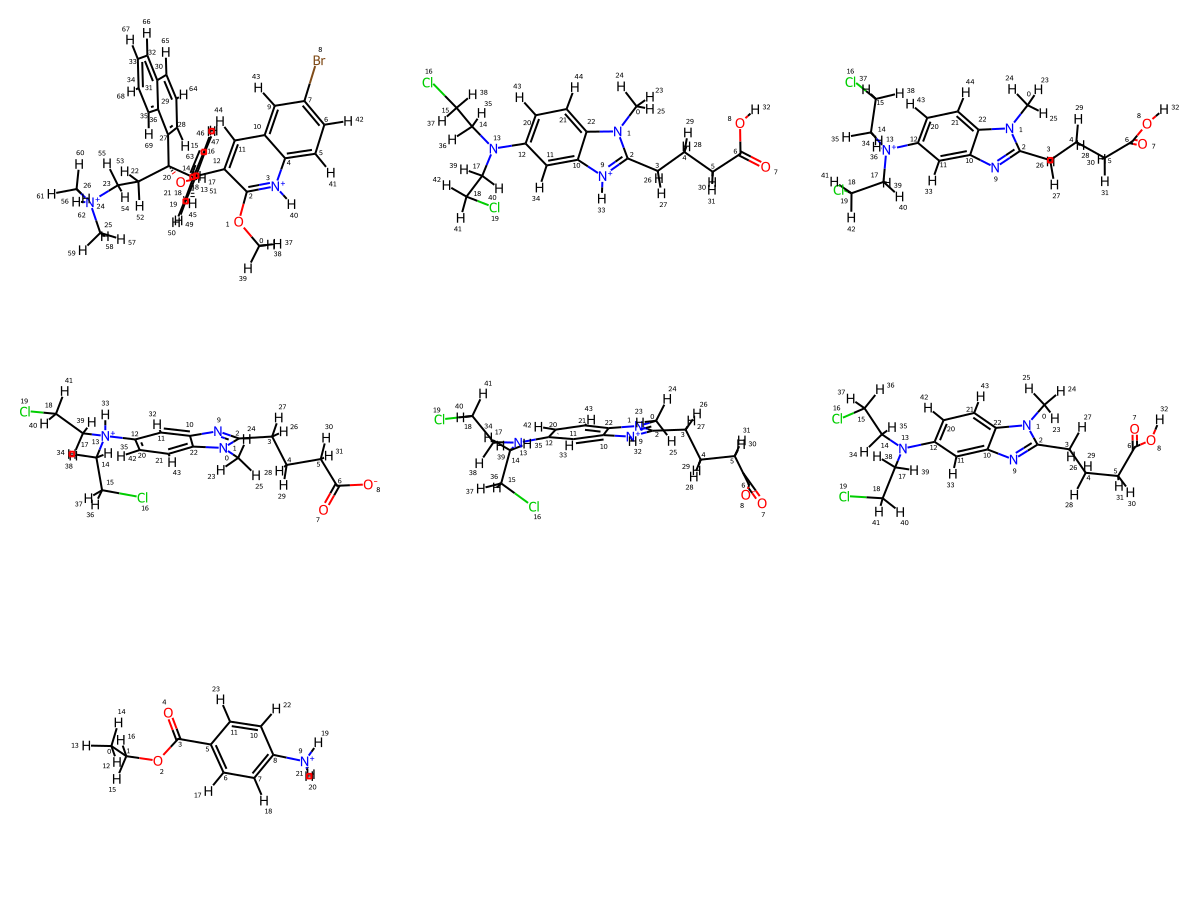

In [3]:
Chem.Draw.MolsToGridImage(df["ROMol"].iloc[3:10], subImgSize=(400, 300))

In [4]:
ff = rdForceFieldHelpers.MMFFGetMoleculeForceField(df["ROMol"].iloc[0], rdForceFieldHelpers.MMFFGetMoleculeProperties(df["ROMol"].iloc[0]))
help(ff.MMFFAddPositionConstraint)

NameError: name 'rdForceFieldHelpers' is not defined

(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36) (0, 1, 2, 4, 10, 9, 7, 8, 6, 5, 12, 13, 14, 19, 18, 17, 16, 15, 20, 21, 22, 23, 24, 26, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36) (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36)
(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36) (0, 1, 2, 4, 10, 9, 7, 8, 6, 5, 12, 13, 14, 19, 18, 17, 16, 15, 20, 21, 22, 23, 24, 26, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22) (0, 1, 2, 3, 4, 5, 6, 7, 8, 21, 20, 12, 13, 14, 15, 16, 17, 18, 19, 11, 10, 22)
(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11

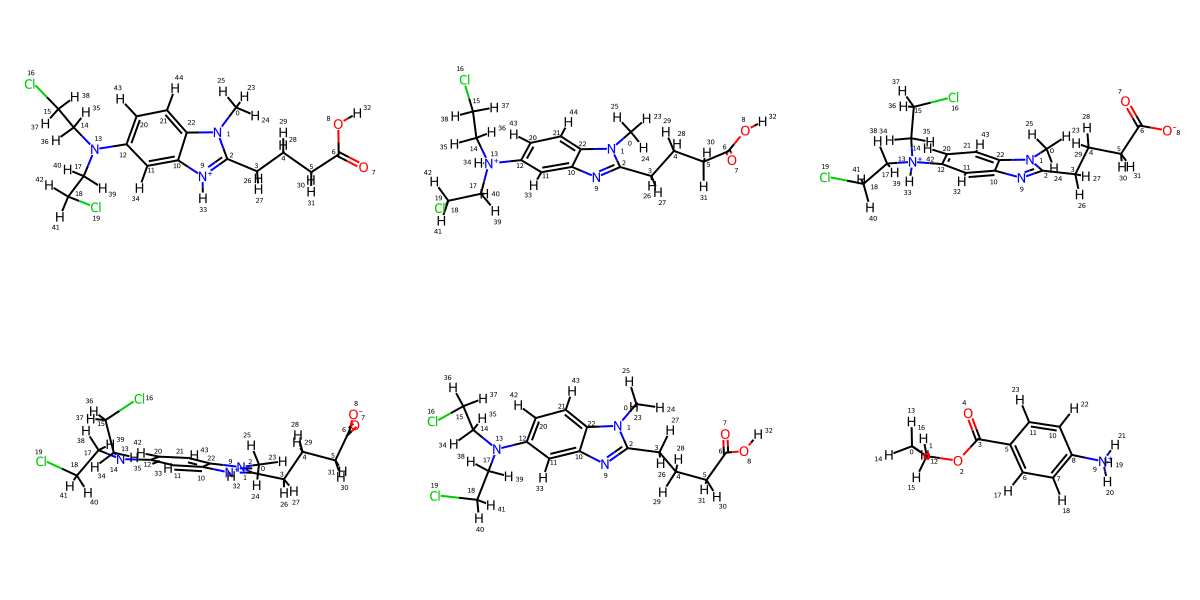

In [5]:
from rdkit.Chem import rdMolTransforms, rdMolAlign, rdRascalMCES, rdForceFieldHelpers
from itertools import product

ROTOR_QUERY = Chem.MolFromSmarts("[!$(*#*)&!D1]-!@[!$(*#*)&!D1]")

df: pd.DataFrame = PandasTools.LoadSDF("out/prepared_ligands.sdf", removeHs=True)
grouped = df.groupby("ID")
mol_sets = grouped["ROMol"].aggregate(lambda s: list(s))
templates = mol_sets.apply(lambda mol_set: mol_set[0])
templates.apply(lambda m: m.UpdatePropertyCache())
# templates.apply(lambda m: rdForceFieldHelpers.MMFFOptimizeMolecule(m))

def align_mol_with_template(row):
    
    mol: Chem.Mol = row["ROMol"]
    mol_id = row["ID"]
    template = templates[mol_id]
    if template == mol:
        # rdForceFieldHelpers.MMFFOptimizeMolecule(mol)
        return
    
    mol_rotors = mol.GetSubstructMatches(ROTOR_QUERY)
    template_rotors = template.GetSubstructMatches(ROTOR_QUERY)

    # mcs = rdFMCS.FindMCS([mol, template]) # TODO: Which...?
    # match_mol = mol.GetSubstructMatch(mcs.queryMol)
    # match_template = template.GetSubstructMatch(mcs.queryMol)
    mces_opts = rdRascalMCES.RascalOptions()
    mces_opts.maxBondMatchPairs = 1200
    mces = rdRascalMCES.FindMCES(mol, template, mces_opts)[0]
    match_mol, match_template = zip(*mces.atomMatches())
    print(match_mol, match_template)
    

    final_match = set()

    for bond in mol.GetBonds():
        bond: Chem.Bond
        a2, a3 = bond.GetBeginAtom().GetIdx(), bond.GetEndAtom().GetIdx()
        if a2 not in match_mol or a3 not in match_mol:
            continue

        template_indices = (match_template[match_mol.index(a2)],
                            match_template[match_mol.index(a3)])
        if not template.GetBondBetweenAtoms(*template_indices):
            continue
        if bond.GetBondType() != template.GetBondBetweenAtoms(*template_indices).GetBondType():
            continue

        bl = rdMolTransforms.GetBondLength(template.GetConformer(), *template_indices)
        if not bond.IsInRing():
            rdMolTransforms.SetBondLength(mol.GetConformer(), a2, a3, bl)
            final_match.add((a2, template_indices[0]))
            final_match.add((a3, template_indices[1]))

        a2_neis = [nei.GetIdx() for nei in mol.GetAtomWithIdx(a2).GetNeighbors()]
        a3_neis = [nei.GetIdx() for nei in mol.GetAtomWithIdx(a3).GetNeighbors()]
        for a1, a4 in product(a2_neis, a3_neis):
            if len([a1, a2, a3, a4]) > len(set([a1, a2, a3, a4])):
                continue

            if a1 in match_mol:
                template_indices = [match_template[match_mol.index(a1)], 
                                    match_template[match_mol.index(a2)], 
                                    match_template[match_mol.index(a3)]]
                ang = rdMolTransforms.GetAngleDeg(template.GetConformer(), *template_indices)
                if not (mol.GetBondBetweenAtoms(a1, a2).IsInRing() and \
                        mol.GetBondBetweenAtoms(a2, a3).IsInRing()):
                    rdMolTransforms.SetAngleDeg(mol.GetConformer(), a1, a2, a3, ang)
            if a4 in match_mol:
                template_indices = [match_template[match_mol.index(a2)], 
                                    match_template[match_mol.index(a3)], 
                                    match_template[match_mol.index(a4)]]
                ang = rdMolTransforms.GetAngleDeg(template.GetConformer(), *template_indices)
                if not (mol.GetBondBetweenAtoms(a2, a3).IsInRing() and \
                        mol.GetBondBetweenAtoms(a3, a4).IsInRing()):
                    rdMolTransforms.SetAngleDeg(mol.GetConformer(), a2, a3, a4, ang)

            if not((a2, a3) in mol_rotors and (a3, a2) in mol_rotors):
                continue
            
            if a1 in match_mol and a4 in match_mol:
                template_indices = [match_template[match_mol.index(a1)], 
                                    match_template[match_mol.index(a2)], 
                                    match_template[match_mol.index(a3)],
                                    match_template[match_mol.index(a4)]]
                dih = rdMolTransforms.GetDihedralDeg(template.GetConformer(), *template_indices)
                if not bond.IsInRing():
                    rdMolTransforms.SetDihedralDeg(mol.GetConformer(), a1, a2, a3, a4, dih)

    rdMolAlign.AlignMol(mol, template, prbCid=0, atomMap=list(zip(match_mol, match_template))) # list(final_match))
    mmffps = rdForceFieldHelpers.MMFFGetMoleculeProperties(mol)
    ff = rdForceFieldHelpers.MMFFGetMoleculeForceField(mol, mmffps)
    for atom in match_mol:
        ff.MMFFAddPositionConstraint(atom, 0.3, 50)
    ff.Minimize()
    # row["Opt"]

df.apply(align_mol_with_template, axis=1)
df["ROMol"] = df["ROMol"].apply(lambda m: Chem.AddHs(m, addCoords=True))
Chem.Draw.MolsToGridImage(df["ROMol"].iloc[4:10], subImgSize=(400, 300))

# templates = mol_sets.apply(lambda mol_set: Chem.MolFromSmarts(rdFMCS.FindMCS(mol_set).smartsString) if len(mol_set) > 1 else None)
# templates.apply(lambda m: m.UpdatePropertyCache() if isinstance(m, Chem.Mol) else None)
# templates = templates.apply(lambda m: Chem.AddHs(m) if isinstance(m, Chem.Mol) else None)
# templates.apply(lambda m: AllChem.EmbedMolecule(m) if isinstance(m, Chem.Mol) else None)

# def generate_constrained_coords(row):
#     mol = row["ROMol"]
    
# df["ROMol"].apply(AllChem.EmbedMolecule)



In [54]:
from rdkit.Chem import rdForceFieldHelpers
props = rdForceFieldHelpers.MMFFGetMoleculeProperties(df["ROMol"].iloc[4])
ff = rdForceFieldHelpers.MMFFGetMoleculeForceField(df["ROMol"].iloc[4], props)

In [55]:
ff.CalcEnergy()

86.73446141691946

In [55]:
df["ROMol"].iloc[4].GetPropsAsDict()

{}

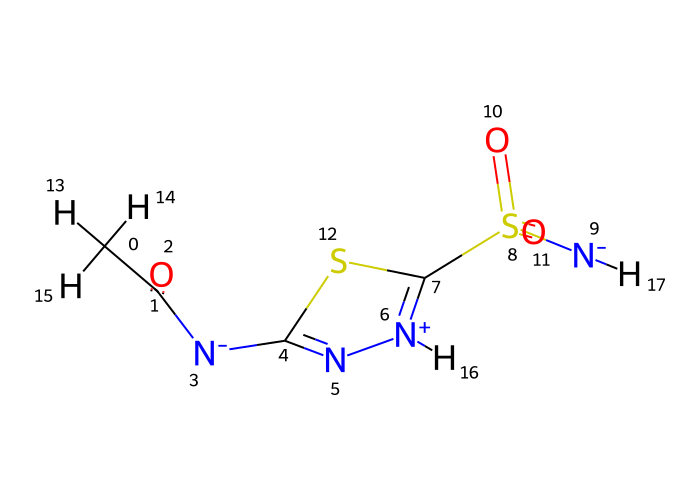

In [6]:
df["ROMol"].iloc[7]

In [44]:
# df: pd.DataFrame = PandasTools.LoadSDF("out/prepared_ligands.sdf", removeHs=False)
IPythonConsole.drawMol3D(df["ROMol"].iloc[16])
IPythonConsole.drawMol3D(df["ROMol"].iloc[17])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [8]:
from rdkit.Chem import rdRascalMCES
mces = rdRascalMCES.FindMCES(df["ROMol"].iloc[4], df["ROMol"].iloc[5])[0]

In [6]:
import sys
sys.path.append("~/tools/")

In [ ]:
from MolGpKa

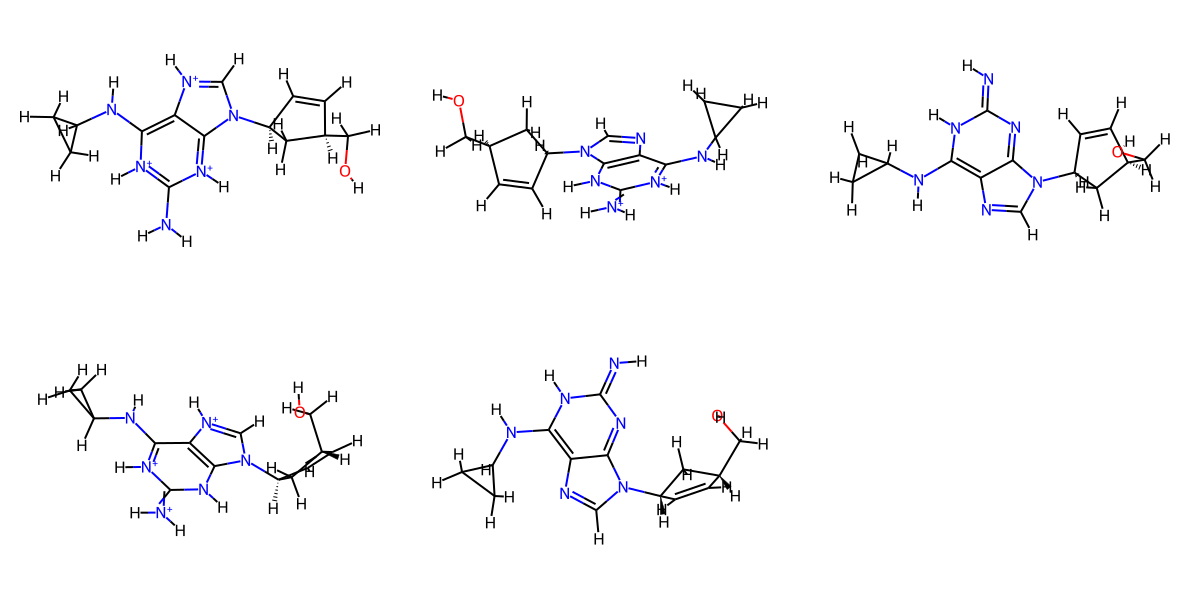

In [7]:
Chem.Draw.MolsToGridImage(df["ROMol"].iloc[:5], subImgSize=(400, 300))

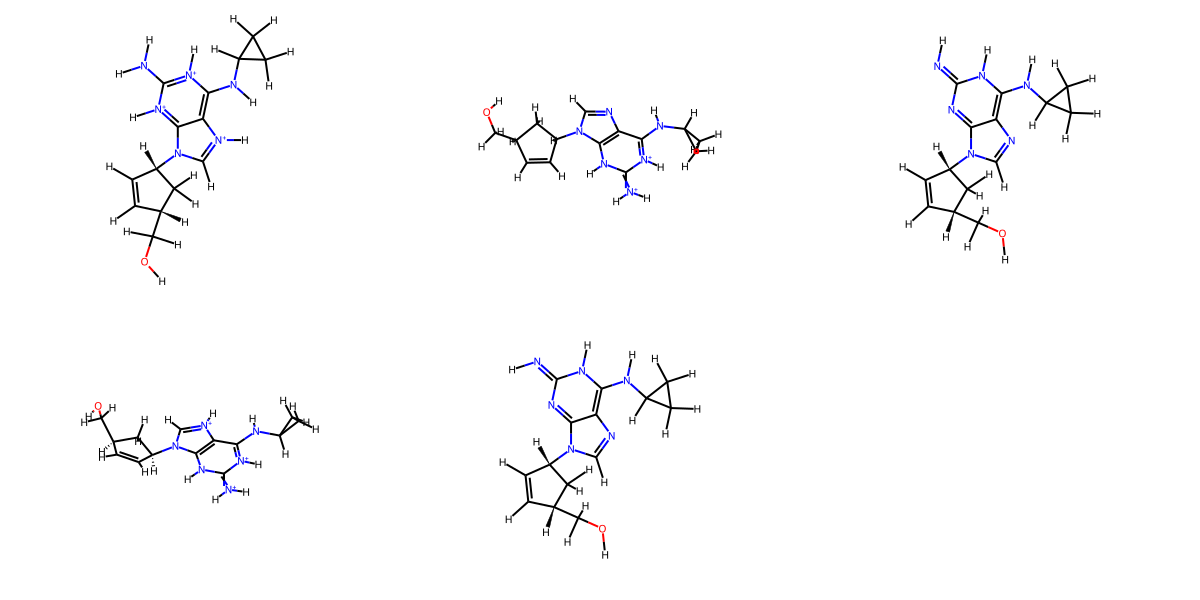

In [14]:
df: pd.DataFrame = PandasTools.LoadSDF("out/prepared_ligands.sdf", removeHs=False)
# df["Energy"] = pd.to_numeric(df["Energy"])
# df["Energy(J/mol)"] = df["Energy"].values * 4.184 * 1000
# mean_energies = df.groupby("ID")["Energy(J/mol)"].mean()
# df["MeanMolEnergy"] = df["ID"].apply(lambda idx: mean_energies.loc[idx])

# k_B = 1.380649e-23  * 6.022e23 # Boltzmann constant in J/K/mol
# T = 298.15 
# df["BFactor"] = np.exp(-(df["Energy(J/mol)"] - df["MeanMolEnergy"]) / (k_B * T))
# partition_fns = df.groupby("ID")["BFactor"].sum()
# df["Partition"] = df["ID"].apply(lambda idx: partition_fns.loc[idx])
# df["Probability"] = df["BFactor"] / df["Partition"]

# df["ExpectedEnergyContribution"] = df["Probability"] * df["Energy"]
# expected_energies = df.groupby("ID")["BFactor"]
df
Chem.Draw.MolsToGridImage(df["ROMol"].iloc[:5], subImgSize=(400, 300))
# k_B = 1.380649e-23  # Boltzmann constant in J/K
# T = 298.15 

# df["BFactor"] = np.exp(-df['Energy(J/mol)'] / (k_B * T))
# df.iloc[0, -1]

In [9]:
df["MeanEnergies"] = pd.merge(df, mean_energies, on="ID")
df

ValueError: Cannot set a DataFrame with multiple columns to the single column MeanEnergies

In [24]:
p = df["Energy"].values 

In [26]:
p

array(['348.35810338345846', '348.48464080975873', '348.5257193899643',
       '348.6070914865692', '348.6564038081741', '50.472075124122505',
       '49.392729875451096', '55.589268106732945', '54.534729709783164',
       '23.608513175043083', '8.838205747599421', '7.04324736667983',
       '7.7517952237000705', '62.89859582918832', '57.779925773917725',
       '63.501176771972304', '69.59851631337357', '80.03540778702305',
       '80.07133656437333', '80.07185548492987', '80.07185551541822',
       '80.0718555168862'], dtype=object)

,UniqueID,SMILES,Energy,Genealogy,ID,ROMol
0,1,[H]/N=c1\nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2C...,348.35810338345846,N=c1nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2CC2)[n...,abacavir,
1,2,[H]/N=c1/nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2C...,348.48464080975873,N=c1nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2CC2)[n...,abacavir,
2,3,[H]/N=c1/nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2C...,348.5257193899643,N=c1nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2CC2)[n...,abacavir,
3,4,[H]/N=c1\nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2C...,348.6070914865692,N=c1nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2CC2)[n...,abacavir,
4,5,[H]/N=c1/nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2C...,348.6564038081741,N=c1nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2CC2)[n...,abacavir,
5,6,CC(=O)[N-]c1nnc(S(N)(=O)=O)s1,50.472075124122505,CC(=O)[N-]c1nnc(S(N)(=O)=O)s1 (protonated)\nCC...,acetazolamide,
6,7,CC(=O)Nc1n[nH+]c(S([NH-])(=O)=O)s1,49.392729875451096,CC(=O)Nc1n[nH+]c(S([NH-])(=O)=O)s1 (protonated...,acetazolamide,
7,8,CC(=O)/N=c1\[nH][nH+]c(S([NH-])(=O)=O)s1,55.589268106732945,CC(=O)Nc1n[nH+]c(S([NH-])(=O)=O)s1 (protonated...,acetazolamide,
8,9,CC(=O)/N=c1/[nH][nH+]c(S([NH-])(=O)=O)s1,54.534729709783164,CC(=O)Nc1n[nH+]c(S([NH-])(=O)=O)s1 (protonated...,acetazolamide,
9,10,CC(=O)OCC[N+](C)(C)C,23.608513175043083,CC(=O)OCC[N+](C)(C)C (3D coordinates assigned)...,acetylcholine,

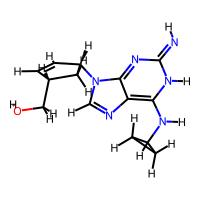
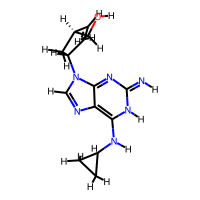
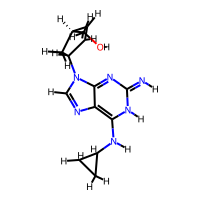
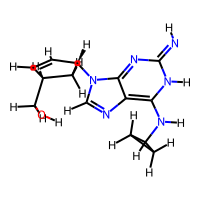
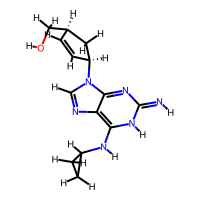
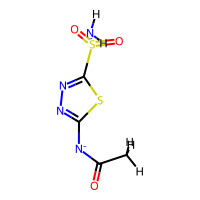
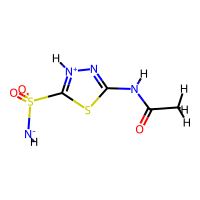
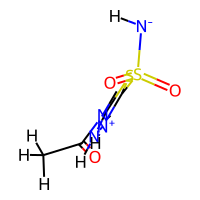
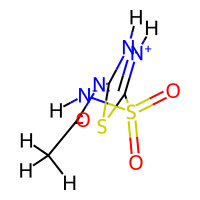
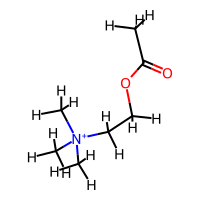
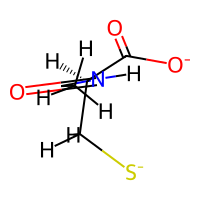
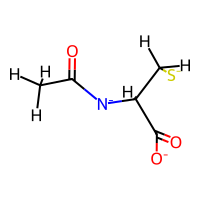
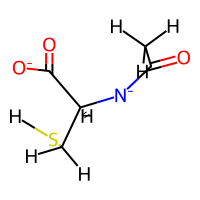
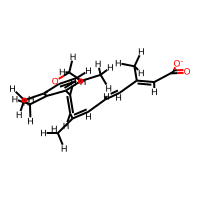
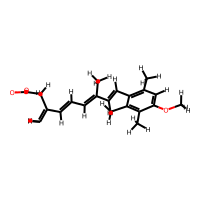
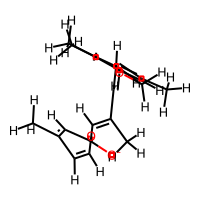
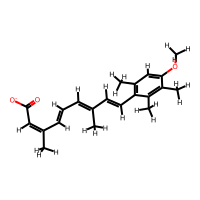
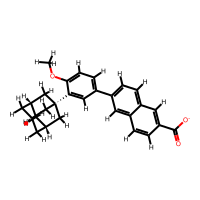
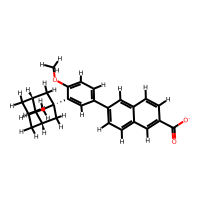
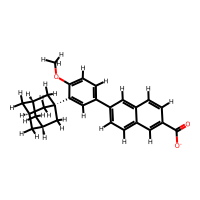
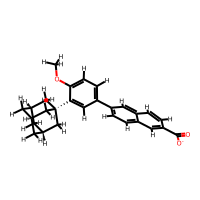
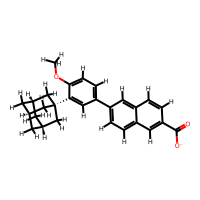

In [16]:
df

In [10]:
df["Energy"].values * 4.184 / 1000

TypeError: can't multiply sequence by non-int of type 'float'

In [4]:
df.loc[df.groupby("ID")["CNNaffinity"].idxmax()]

,UniqueID,SMILES,Energy,Genealogy,minimizedAffinity,CNNscore,CNNaffinity,CNN_VS,CNNaffinity_variance,ID,ROMol
9,2,[H]/N=c1/nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2C...,348.48464080975873,N=c1nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2CC2)[n...,-7.14749,0.4631908834,5.1858768463,2.4020509720,0.4665614963,abacavir,<rdkit.Chem.rdchem.Mol object at 0x7f341fe1e6d0>
53,6,CC(=O)[N-]c1nnc(S(N)(=O)=O)s1,50.472075124122505,CC(=O)[N-]c1nnc(S(N)(=O)=O)s1 (protonated)\nCC...,-5.41025,0.4440793395,4.9310622215,2.1897828579,0.1067527682,acetazolamide,<rdkit.Chem.rdchem.Mol object at 0x7f341fe2eac0>
81,10,CC(=O)OCC[N+](C)(C)C,23.608513175043083,CC(=O)OCC[N+](C)(C)C (3D coordinates assigned)...,-3.87261,0.5122135878,3.2409813404,1.6600747108,0.6892536283,acetylcholine,<rdkit.Chem.rdchem.Mol object at 0x7f341fe39740>
90,11,CC(=O)N[C@@H](C[S-])C(=O)[O-],8.838205747599421,CC(=O)N[C@@H](C[S-])C(=O)[O-] (protonated)\nCC...,-4.52376,0.7899588346,3.9268279076,3.1020324230,0.3315690756,acetylcysteine,<rdkit.Chem.rdchem.Mol object at 0x7f341fe39b30>
126,15,C=C(/C=C/C=C(C)/C=C/c1c(C)cc(OC)c(C)c1C)CC(=O)...,57.779925773917725,COc1cc(C)c(/C=C/C(C)=C/C=C/C(C)=C/C(=O)[O-])c(...,-6.92408,0.5639792681,6.0128369331,3.3911154270,0.0304473396,acitretin,<rdkit.Chem.rdchem.Mol object at 0x7f341fdc6eb0>
168,19,COc1ccc(-c2ccc3cc(C(=O)[O-])ccc3c2)cc1C12CC3CC...,80.07133656437333,COc1ccc(-c2ccc3cc(C(=O)[O-])ccc3c2)cc1C12CC3CC...,-3.17702,0.4961249828,5.9789471626,2.9663050175,0.1148307174,adapalene,<rdkit.Chem.rdchem.Mol object at 0x7f341fde2430>


In [29]:
d = df.sort_values("CNNaffinity", ascending=False)

In [33]:
IPythonConsole.drawMol3D(d.iloc[0]["ROMol"])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

,UniqueID,SMILES,Energy,Genealogy,minimizedAffinity,CNNscore,CNNaffinity,CNN_VS,CNNaffinity_variance,ID,ROMol
0,1,[H]/N=c1\nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2C...,348.35810338345846,N=c1nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2CC2)[n...,-5.64103,0.1904781163,4.4745283127,0.8522997499,0.4388170242,abacavir,
1,1,[H]/N=c1\nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2C...,348.35810338345846,N=c1nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2CC2)[n...,-5.53634,0.1810808629,4.4009361267,0.7969253063,0.3844013512,abacavir,
2,1,[H]/N=c1\nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2C...,348.35810338345846,N=c1nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2CC2)[n...,-6.28848,0.1528119594,4.0750055313,0.6227095723,0.5900190473,abacavir,
3,1,[H]/N=c1\nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2C...,348.35810338345846,N=c1nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2CC2)[n...,-7.09991,0.1444229335,4.2738566399,0.6172429323,0.5885373354,abacavir,
4,1,[H]/N=c1\nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2C...,348.35810338345846,N=c1nc2c(ncn2[C@H]2C=C[C@@H](CO)C2)c(NC2CC2)[n...,-5.99505,0.1211993769,3.6621754169,0.4438533783,0.9661368132,abacavir,
...,...,...,...,...,...,...,...,...,...,...,...
193,22,COc1ccc(-c2ccc3cc(C(=O)[O-])ccc3c2)cc1C12CC3CC...,80.0718555168862,COc1ccc(-c2ccc3cc(C(=O)[O-])ccc3c2)cc1C12CC3CC...,-3.09754,0.4947113097,5.4600901604,2.7011682987,0.1934115589,adapalene,
194,22,COc1ccc(-c2ccc3cc(C(=O)[O-])ccc3c2)cc1C12CC3CC...,80.0718555168862,COc1ccc(-c2ccc3cc(C(=O)[O-])ccc3c2)cc1C12CC3CC...,-3.26287,0.4876632690,5.4934401512,2.6789488792,0.2642101347,adapalene,
195,22,COc1ccc(-c2ccc3cc(C(=O)[O-])ccc3c2)cc1C12CC3CC...,80.0718555168862,COc1ccc(-c2ccc3cc(C(=O)[O-])ccc3c2)cc1C12CC3CC...,-5.24616,0.4766299725,5.6310300827,2.6839177608,0.1435451508,adapalene,
196,22,COc1ccc(-c2ccc3cc(C(=O)[O-])ccc3c2)cc1C12CC3CC...,80.0718555168862,COc1ccc(-c2ccc3cc(C(=O)[O-])ccc3c2)cc1C12CC3CC...,-4.43889,0.4293008447,5.2425107956,2.2506144047,0.4260713160,adapalene,

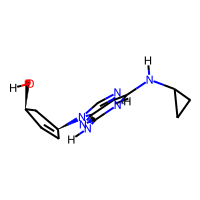
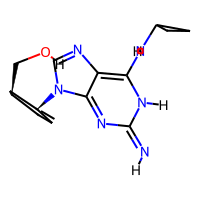
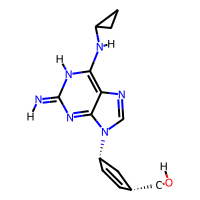
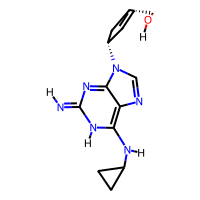
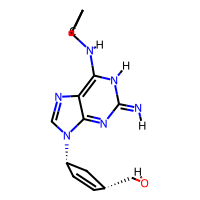
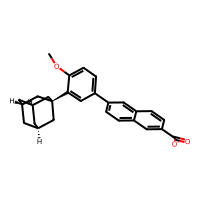
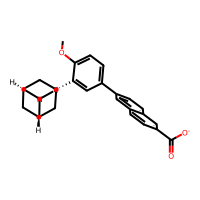
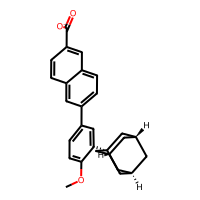
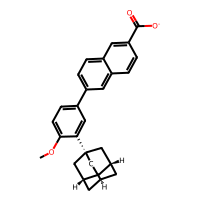
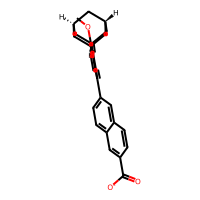

In [28]:
df